## Câu 1 : Thực hiện các câu lệnh tạo bảng

In [1]:
import sqlite3

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Kết nối đến Database có tên ThiLDS4

In [67]:
conn = sqlite3.connect('ThiLDS4.db')

In [32]:
def executeSqls(sql):
    cursor = conn.cursor()
    cursor.executescript(sql)
    cursor.close()

In [33]:
def executeSql(sql):
    cursor = conn.cursor()
    cursor.execute(sql)
    row = cursor.fetchone()
    while row:
        print(row)
        row = cursor.fetchone()
    cursor.close()


In [39]:
def executeMany(sql, param):
    cursor = conn.cursor()
    cursor.executemany(sql, param)
    cursor.close()

#### 2. Thực hiện các câu lệnh để tạo cấu trúc các bảng sau

In [68]:
createTable = '''
    create table PHONG_BAN(
        Mapb varchar(2) primary key,
        Tenphong varchar(50) not null
    );
    
    create table NHAN_VIEN(
        Manv varchar(3) primary key,
        Tennv varchar(50) not null,
        Mapb varchar(2) not null,
        CONSTRAINT FK_PhongBanId FOREIGN KEY (Mapb) REFERENCES PHONG_BAN(Mapb) 
    );
    
    create table DE_NGHI(
        Sotu varchar(7) primary key,
        Ngay_tu DateTime not null,
        Manv varchar(3) not null,
        Sotien_tu int,
        CONSTRAINT FK_NhanVienId FOREIGN KEY (Manv) REFERENCES Suppliers(Manv)
    );
    
    create table PHIEU_CHI(
        Sopc varchar(5) primary key,
        Ngay_chi DateTime not null,
        Sotu varchar(7) not null,
        Manv varchar(3) not null,
        Sotien_chi int,
        CONSTRAINT FK_DeNghiID FOREIGN KEY (Sotu) REFERENCES DE_NGHI(id),
        CONSTRAINT FK_NhanVienID FOREIGN KEY (Manv) REFERENCES NHAN_VIEN(id)
    );
'''
executeSqls(createTable)

#### 3. Thực hiện các câu lệnh SQL để thêm dữ liệu vào các bảng theo mô tả sau

In [69]:
paramPhongBan = [("KT","Phòng kế toán"), ("NS","Phòng nhân sự"), ("TV","Phòng Tư vấn - chăm sóc khách hàng"), ("MH","Phòng mua hàng"), ("KD","Phòng kinh doanh")]
cursor = conn.cursor()
cursor.executemany("INSERT INTO PHONG_BAN VALUES(?,?);", paramPhongBan)


In [70]:
paramNhanVien = [("A01","Hoàng Ngọc Anh", "MH"), ("B01","Trần Văn Bình","NS"), 
                 ("C01","Lê Thị Châu", "KD"), ("C02","Nguyễn Văn Chính", "KD"), 
                 ("D01","Lê Văn Dũng", "KT"), ("E01","Nguyễn Thi Thu Thủy", "TV")]
sqlNV = "INSERT INTO NHAN_VIEN VALUES(?,?,?);"
executeMany(sqlNV, paramNhanVien)

In [71]:
paramDeNghi = [("2005001","15/4/2005", "A01", 10000000), ("2005002","20/4/2005", "B01", 2000000),
              ("2005003","28/4/2005", "C01", 3500000), ("2005004","10/5/2005", "C02", 5000000),
              ("2005005","12/7/2005", "A01", 4000000), ("2005006","14/8/2005", "C01", 3000000)]
sqlDN = "INSERT INTO DE_NGHI VALUES(?,?,?,?);"
executeMany(sqlDN, paramDeNghi)

In [72]:
paramPhieuChi = [("PC001","15/4/2005", "2005001", "A01", 10000000 ), ("PC002","21/4/2005", "2005002", "B01", 2000000 ),
                ("PC003","24/8/2005", "2005003", "C01", 3500000 ), ("PC004","11/5/2005", "2005004", "C02", 2000000 ),
                ("PC005","13/5/2005", "2005004", "C02", 1000000 ), ("PC006","15/7/2005", "2005005", "A01", 10000000 )]
sqlPC = "INSERT INTO PHIEU_CHI VALUES(?,?,?,?,?);"
executeMany(sqlPC, paramPhieuChi)

In [73]:
conn.commit()

### Câu 2 : Thực hiện các câu lệnh truy vấn dữ liệu

#### 1.	Liệt kê danh sách các nhân viên có tên lót là Văn 

In [74]:
sql1 = "select * from NHAN_VIEN where Tennv like '%Văn%'"
executeSql(sql1)

('B01', 'Trần Văn Bình', 'NS')
('C02', 'Nguyễn Văn Chính', 'KD')
('D01', 'Lê Văn Dũng', 'KT')


#### 2.	Liệt kê các nhân viên với tổng số tiền tạm ứng của mỗi nhân viên (một nhân viên có thể có nhiều phiếu tạm ứng). Thông tin liệt kê bao gồm : Manv, Tên nhân viên và Tổng tiền tạm ứng

In [75]:
sql2 = "select nv.MaNV, nv.TenNV, sum(dn.Sotien_tu) from NHAN_VIEN nv join DE_NGHI dn on dn.Manv = nv.Manv group by nv.MaNV, nv.TenNV"
executeSql(sql2)

('A01', 'Hoàng Ngọc Anh', 14000000)
('B01', 'Trần Văn Bình', 2000000)
('C01', 'Lê Thị Châu', 6500000)
('C02', 'Nguyễn Văn Chính', 5000000)


#### 3.	Liệt kê các phiếu đề nghị tạm ứng mà chưa có phiếu chi. Thông tin liệt kê bao gồm : Số tạm ứng, Ngày tạm ứng và Manv

In [76]:
sql3 = "select * from DE_NGHI where sotu not in (select sotu from PHIEU_CHI)"
executeSql(sql3)

('2005006', '14/8/2005', 'C01', 3000000)


#### 4.	Liệt kê các phiếu đề nghị tạm ứng có Số tiền tạm ứng lớn hơn Số tiền tạm ứng trung bình

In [77]:
sql3 = "select * from DE_NGHI where Sotien_tu > (select AVG(Sotien_tu) from DE_NGHI)"
executeSql(sql3)

('2005001', '15/4/2005', 'A01', 10000000)
('2005004', '10/5/2005', 'C02', 5000000)


#### 5.	Liệt kê các phiếu tạm ứng chưa được chi đủ số tiền đề nghị tạm ứng (Tổng tiền chi < Tiền đề nghị tạm ứng)

In [ ]:
sql5 = "select * from DE_NGHI where Sotien_tu > (select SUM(Sotien_tu) from DE_NGHI)"
executeSql(sql5)

#### 6.	Liệt kê danh sách các nhân viên có nhiều lần đề nghị tạm ứng nhất 

In [78]:
sql6 = """select * from DE_NGHI where Manv in 
                (select Manv from DE_NGHI GROUP by Manv HAVING count(Manv) > 1)
        """
executeSql(sql6)

('2005001', '15/4/2005', 'A01', 10000000)
('2005003', '28/4/2005', 'C01', 3500000)
('2005005', '12/7/2005', 'A01', 4000000)
('2005006', '14/8/2005', 'C01', 3000000)


### Câu 3 : Trực quan hóa dữ liệu 

#### 1.	Thực hiện truy vấn tính Tổng số tiền tạm ứng của các phòng ban, kết quả lưu vào DataFrame như sau: 

In [81]:
sqlpd = """
        select p.mapb, Tenphong, sum(dn.Sotien_tu) TongTien
        from PHONG_BAN p join NHAN_VIEN nv on nv.Mapb = p.Mapb
        JOIN DE_NGHI dn on dn.Manv = nv.Manv
        GROUP by p.mapb, Tenphong
""" 
df = pd.read_sql_query(sqlpd, conn)
df.head()


,Mapb,Tenphong,TongTien
0,KD,Phòng kinh doanh,11500000
1,MH,Phòng mua hàng,14000000
2,NS,Phòng nhân sự,2000000


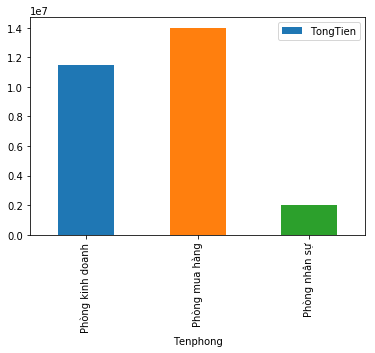

In [86]:
df.plot.bar(x='Tenphong', y='TongTien')
plt.title = "Tong Tien tam ung"

#### 3.	Sử dụng thư viện matplotlib để vẽ biểu đồ pie (Pie chart) như sau 

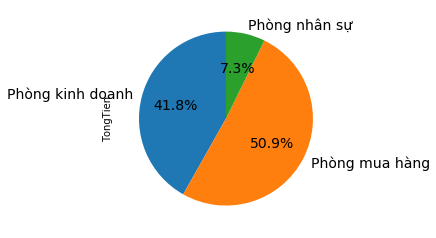

In [87]:
df.plot(kind='pie', y = 'TongTien', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['Tenphong'], legend = False, fontsize=14)

#### 4.	Nhận xét cho 2 biểu đồ trên 

##### Phong mua hang tam ung tien nhieu nhat, Phong Nhan su tam ung tien it nhat

In [89]:
conn.close()